<a href="https://colab.research.google.com/github/Simranrajj/employee_turnover/blob/main/Employee_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'satisfaction_level': [0.2, 0.8, 0.5, 0.6, 0.4, 0.9, 0.3, 0.7, 0.5, 0.8],
    'last_evaluation': [0.5, 0.9, 0.6, 0.7, 0.6, 0.9, 0.5, 0.8, 0.6, 0.9],
    'number_projects': [2, 5, 3, 4, 2, 5, 3, 4, 3, 5],
    'average_monthly_hours': [200, 300, 250, 280, 220, 320, 210, 290, 260, 310],
    'time_spend_company': [1, 3, 2, 4, 1, 5, 2, 3, 3, 4],
    'Work_accident': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'promotion_last_5years': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Department': ['HR', 'IT', 'Sales', 'Support', 'HR', 'IT', 'Sales', 'Support', 'HR', 'IT'],
    'salary': ['low', 'medium', 'medium', 'high', 'low', 'medium', 'high', 'medium', 'low', 'high'],
    'left': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

}

In [18]:
df=pd.DataFrame(data)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     10 non-null     float64
 1   last_evaluation        10 non-null     float64
 2   number_projects        10 non-null     int64  
 3   average_monthly_hours  10 non-null     int64  
 4   time_spend_company     10 non-null     int64  
 5   Work_accident          10 non-null     int64  
 6   promotion_last_5years  10 non-null     int64  
 7   Department             10 non-null     object 
 8   salary                 10 non-null     object 
 9   left                   10 non-null     int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 928.0+ bytes


In [20]:
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_projects,0
average_monthly_hours,0
time_spend_company,0
Work_accident,0
promotion_last_5years,0
Department,0
salary,0
left,0


In [21]:
x = df.drop(columns='left')
y = df['left']

In [22]:
x_encoded = pd.get_dummies(x, columns=['Department', 'salary'], drop_first=True)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y, test_size=0.2,  random_state=42)


In [24]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = rf.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


[0 1]
Model Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[1 0]
 [0 1]]


In [26]:
y

,left
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0
9,1


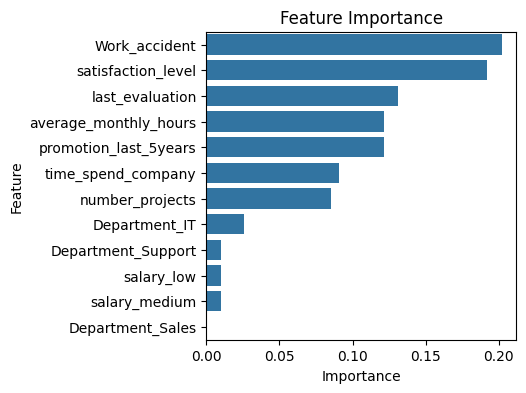

In [27]:
importances = rf.feature_importances_
feature_names = x_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(4,4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [28]:
def preprocess_user_input(satisfaction_level, number_projects, average_monthly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, salary):
    user_data = pd.DataFrame({
        'satisfaction_level': [satisfaction_level],
        'number_projects': [number_projects],
        'average_monthly_hours': [average_monthly_hours],
        'time_spend_company': [time_spend_company],
        'Work_accident': [Work_accident],
        'promotion_last_5years': [promotion_last_5years],
        'Department': [Department],
        'salary': [salary]
    })

    user_data = pd.get_dummies(user_data, columns=['Department', 'salary'], drop_first=True)


    missing_cols = set(x_encoded.columns) - set(user_data.columns)
    for col in missing_cols:
        user_data[col] = 0
    user_data = user_data[x_encoded.columns]

    return user_data

def predict_left(satisfaction_level, number_projects, average_monthly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, salary):
    user_data = preprocess_user_input(satisfaction_level, number_projects, average_monthly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, salary)
    prediction = rf.predict(user_data)
    return 'Left' if prediction[0] == 1 else 'Stayed'


In [30]:

satisfaction_level = 0.1
number_projects = 7
average_monthly_hours = 670
time_spend_company = 7
Work_accident = 6
promotion_last_5years = 0
Department = 'HR'
salary = 'high'


result = predict_left(satisfaction_level, number_projects, average_monthly_hours, time_spend_company, Work_accident, promotion_last_5years, Department, salary)
print(f'The prediction is: {result}')


The prediction is: Left
